In [1]:
from pca_functions import *

In [2]:
df_90 = pd.read_csv(r'D:\vr-pipeline\data\results\28052025_segment_data_t123_90s_1s_ketone.csv')
#df_45= pd.read_csv(r'D:\vr-pipeline\data\results\22052025_segment_data_t123_45s_45s_ketone.csv')
df_30 = pd.read_csv(r'D:\vr-pipeline\data\results\28052025_segment_data_t123_30s_30s_ketone.csv')


df_all = pd.concat([df_90, df_30], ignore_index=True)

In [3]:
df_30_empty_room=df_30[df_30['trial'] == 7]
df_30_pca = df_30_empty_room.drop(columns=['participant_id', 'edge_dist','drink', 'session','trial', 'version', 'segment', 'stops_count','unsafe_area_coverage', 'safe_area_coverage', 'safe_time_spent', 'unsafe_time_spent','outside_time_spent'])
scaler=StandardScaler()
df_30_pca_scaled=scaler.fit_transform(df_30_pca)
find_num_components_explaining_90variance(df_30_pca_scaled)

No. of components explaining 80 % of the variance in data: 2
No. of components explaining 85 % of the variance in data: 3
No. of components explaining 90 % of the variance in data: 4
No. of components explaining 95 % of the variance in data: 5
No. of components explaining 99 % of the variance in data: 6


In [4]:
df_30_pca_df = pd.DataFrame(df_30_pca_scaled, columns=df_30_pca.columns)
reduced_3_data_30=reduce_data(df_30_pca_df, 3)

Proportion of variance explained by each of the 3 components is: [0.46600979 0.19914183 0.14328568]
Total explained variance by 3 components is: 80.8437292742328


In [5]:
reduced_3_data_30_df = pd.DataFrame(reduced_3_data_30, columns=[f'PC{i+1}' for i in range(reduced_3_data_30.shape[1])])
reduced_3_data_30_df

,PC1,PC2,PC3
0,-0.681574,0.476294,1.480454
1,0.269019,0.798750,0.066075
2,-2.013438,0.010175,-2.790449
3,0.080709,-0.237782,0.675835
4,1.110902,0.409171,2.233289
...,...,...,...
109,1.314080,0.433823,-0.598442
110,1.311895,1.815083,-0.163705
111,-0.047698,0.319402,0.177780
112,1.092120,1.084931,-0.465064


In [6]:
combined_30_empty_room = pd.concat([
    df_30_empty_room[['participant_id', 'session', 'drink', 'segment']].reset_index(drop=True),
    reduced_3_data_30_df[['PC1', 'PC2', 'PC3']].reset_index(drop=True)
], axis=1)


In [7]:
#combined_30_empty_room.to_csv('../data/pca/combined_30_empty_room_pca.csv', index=False)

In [8]:
component_weight_30_empty_room = components_weight(df_30_pca_df, 3)

In [9]:
# Rename the columns with more descriptive names
component_weight_30_empty_room = component_weight_30_empty_room.rename(
    columns={
        'center_dist': 'Distance from Center',
        'speed': 'Movement Speed',
        'acceleration': 'Movement Acceleration',
        'stops_duration': 'Duration of Stops',
        'max_distance': 'Maximum Distance',
        'area_covered': 'Area Coverage',
        'rmssd': 'RMSSD',
        'hr': 'HR'
    }
)

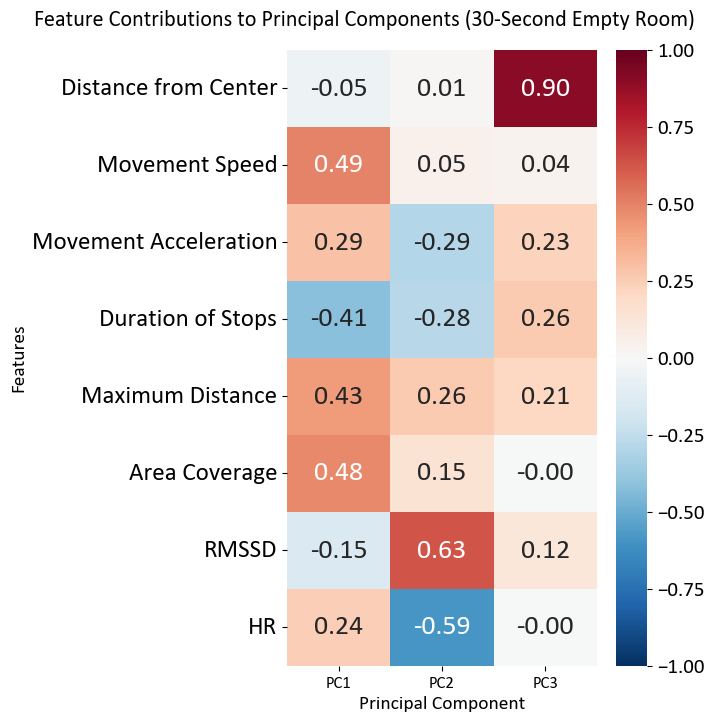

In [11]:
fig, ax = display_pc_weights_1(component_weight_30_empty_room, is_horizontal=False)

# Add title now!
fig.suptitle("Feature Contributions to Principal Components (30-Second Empty Room)", fontsize=16, x=0.28, y=0.93)

plt.show()